In [2]:
import pandas as pd

In [5]:
data = pd.read_csv('/Users/chenshunchao/Downloads/youtube-new/USvideos.csv')

In [6]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [123]:
data = data[['category_id', 'title', 'tags', 'description']]

In [124]:
data.head()

,category_id,title,tags,description
0,22,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,24,The Trump Presidency: Last Week Tonight with J...,"last week tonight trump presidency|""last week ...","One year after the presidential election, John..."
2,23,"Racist Superman | Rudy Mancuso, King Bach & Le...","racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,24,Nickelback Lyrics: Real or Fake?,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...
4,24,I Dare You: GOING BALD!?,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...


In [125]:
data_J = pd.read_json('/Users/chenshunchao/Downloads/youtube-new/US_category_id.json')

In [126]:
data_J['items'][0]['snippet']['title']

'Film & Animation'

In [127]:
data_J['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [128]:
# replaced all the ID numbers by their corresponding categories

ids=[]
for index, row in data.iterrows():
    search_id=row['category_id']
    
    for i in range (len(data_J)):
        if str(search_id)==data_J['items'][i]['id']:
            ids.append(data_J['items'][i]['snippet']['title'])
        
data['new_id']=ids

In [129]:
print(data.shape)
data.head()

(40949, 5)


,category_id,title,tags,description,new_id
0,22,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,24,The Trump Presidency: Last Week Tonight with J...,"last week tonight trump presidency|""last week ...","One year after the presidential election, John...",Entertainment
2,23,"Racist Superman | Rudy Mancuso, King Bach & Le...","racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,24,Nickelback Lyrics: Real or Fake?,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...,Entertainment
4,24,I Dare You: GOING BALD!?,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...,Entertainment


In [130]:
data_set = data.drop(columns = ['category_id'])

In [131]:
data_set.head()

,title,tags,description,new_id
0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,The Trump Presidency: Last Week Tonight with J...,"last week tonight trump presidency|""last week ...","One year after the presidential election, John...",Entertainment
2,"Racist Superman | Rudy Mancuso, King Bach & Le...","racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,Nickelback Lyrics: Real or Fake?,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...,Entertainment
4,I Dare You: GOING BALD!?,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...,Entertainment


In [135]:
# clean tags data

import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus1 = []
for i in range(0, len(data_set)):
    tag = re.sub('[^a-zA-Z]', ' ', data_set['tags'][i])
    tag = tag.lower().split()
    ps = PorterStemmer()
    tag = [ps.stem(word) for word in tag if not word in set(stopwords.words ('english'))]
    tag = ' '.join(tag)
    corpus1.append(tag)


In [140]:
data_set['tags'] = corpus1

In [141]:
data_set.head()

,title,tags,description,new_id
0,WE WANT TO TALK ABOUT OUR MARRIAGE,shantel martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presid last week tonig...,"One year after the presidential election, John...",Entertainment
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman rudi mancuso king bach racist ...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,Nickelback Lyrics: Real or Fake?,rhett link gmm good mythic morn rhett link goo...,Today we find out if Link is a Nickelback amat...,Entertainment
4,I Dare You: GOING BALD!?,ryan higa higatv nigahiga dare idi rhpc dare t...,I know it's been a while since we did this sho...,Entertainment


In [152]:
# clean title data

import time
start_time = time.time()
corpus2 = []
for i in range(0, len(data_set)):
    tit = re.sub('[^a-zA-Z]', ' ', data_set['title'][i])
    tit = tit.lower().split()
    ps = PorterStemmer()
    tit = [ps.stem(word) for word in tit if not word in set(stopwords.words ('english'))]
    tit = ' '.join(tit)
    corpus2.append(tit)
print("-- %s seconds --" % (time.time() - start_time))

-- 64.60618090629578 seconds --


In [154]:
data_set['title'] = corpus2

In [163]:
data_set.head()

,title,tags,description,new_id
0,want talk marriag,shantel martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,trump presid last week tonight john oliv hbo,last week tonight trump presid last week tonig...,"One year after the presidential election, John...",Entertainment
2,racist superman rudi mancuso king bach lele pon,racist superman rudi mancuso king bach racist ...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,nickelback lyric real fake,rhett link gmm good mythic morn rhett link goo...,Today we find out if Link is a Nickelback amat...,Entertainment
4,dare go bald,ryan higa higatv nigahiga dare idi rhpc dare t...,I know it's been a while since we did this sho...,Entertainment


In [168]:
# clean description data, it is really time consuming 

start_time = time.time()
corpus3 = []
for i in range(0, len(data_set)):
    des = re.sub('[^a-zA-Z]', ' ', str(data_set['description'][i]))
    des = des.lower().split()
    ps = PorterStemmer()
    des = [ps.stem(word) for word in des if not word in set(stopwords.words ('english'))]
    des = ' '.join(des)
    corpus3.append(des)
print("-- %s seconds --" % (time.time() - start_time))

-- 1224.6449739933014 seconds --


In [170]:
data_set['description'] = corpus3

In [171]:
data_set.head()

,title,tags,description,new_id
0,want talk marriag,shantel martin,shantel channel http www youtub com shantellma...,People & Blogs
1,trump presid last week tonight john oliv hbo,last week tonight trump presid last week tonig...,one year presidenti elect john oliv discuss le...,Entertainment
2,racist superman rudi mancuso king bach lele pon,racist superman rudi mancuso king bach racist ...,watch previou video n nsubscrib http www youtu...,Comedy
3,nickelback lyric real fake,rhett link gmm good mythic morn rhett link goo...,today find link nickelback amateur secret nick...,Entertainment
4,dare go bald,ryan higa higatv nigahiga dare idi rhpc dare t...,know sinc show back might best episod yet nlea...,Entertainment


In [9]:
# Output the after-cleaned data to csv

data_set.to_csv(r'/Users/chenshunchao/Downloads/youtube-new/US_cleaned.csv', index = False)

In [173]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 4 columns):
title          40949 non-null object
tags           40949 non-null object
description    40949 non-null object
new_id         40949 non-null object
dtypes: object(4)
memory usage: 1.2+ MB


In [174]:
data_set.isnull().sum()

title          0
tags           0
description    0
new_id         0
dtype: int64

In [179]:
data_set.shape

(40949, 4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_set = pd.read_csv('/Users/chenshunchao/Downloads/youtube-new/US_cleaned.csv', index_col = 0)

In [7]:
# add views to the csv for checking the category trends 
data_set['Views'] = data['views']

In [8]:
data_set.head()

,title,tags,description,new_id,Views
Unnamed: 0,,,,,
0,want talk marriag,shantel martin,shantel channel http www youtub com shantellma...,People & Blogs,748374
1,trump presid last week tonight john oliv hbo,last week tonight trump presid last week tonig...,one year presidenti elect john oliv discuss le...,Entertainment,2418783
2,racist superman rudi mancuso king bach lele pon,racist superman rudi mancuso king bach racist ...,watch previou video n nsubscrib http www youtu...,Comedy,3191434
3,nickelback lyric real fake,rhett link gmm good mythic morn rhett link goo...,today find link nickelback amateur secret nick...,Entertainment,343168
4,dare go bald,ryan higa higatv nigahiga dare idi rhpc dare t...,know sinc show back might best episod yet nlea...,Entertainment,2095731


In [8]:
hist_d = data_set.groupby(['new_id'])['Views'].sum()

In [9]:
hist_d1 = hist_d.to_frame()

In [10]:
hist_d2 = hist_d1.sort_values(by=['Views'])

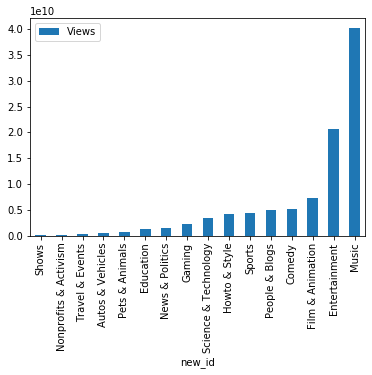

In [11]:
hist_d2.plot.bar()

In [12]:
# hist_d2 = hist_d1.reset_index()

In [40]:
# Turn the id back to number for further classification 
# data_set['new_id'] = data['category_id']

In [9]:
data_set.head()

,title,tags,description,new_id,Views
Unnamed: 0,,,,,
0,want talk marriag,shantel martin,shantel channel http www youtub com shantellma...,People & Blogs,748374
1,trump presid last week tonight john oliv hbo,last week tonight trump presid last week tonig...,one year presidenti elect john oliv discuss le...,Entertainment,2418783
2,racist superman rudi mancuso king bach lele pon,racist superman rudi mancuso king bach racist ...,watch previou video n nsubscrib http www youtu...,Comedy,3191434
3,nickelback lyric real fake,rhett link gmm good mythic morn rhett link goo...,today find link nickelback amateur secret nick...,Entertainment,343168
4,dare go bald,ryan higa higatv nigahiga dare idi rhpc dare t...,know sinc show back might best episod yet nlea...,Entertainment,2095731


In [10]:
# combine mutiple columns together to make a corpus
data_set['Combined_Corpus'] = data_set['title'] + data_set ['tags'] + data_set ['description']

In [11]:
# check if it works
data_x = data_set['Combined_Corpus'].values.ravel()
data_x[0:3]

array(['want talk marriagshantel martinshantel channel http www youtub com shantellmartin ncandic http www lovebilli com n nfilm video k http amzn stdnrz nwith len http amzn rujomd nbig drone http tinyurl com h ft oy nother gear http amzn glx nsoni camera http amzn nobmnv nold camera http amzn cqbt nmain len http amzn od gbj nbig soni camera http amzn nrdjro nbig canon camera http tinyurl com jn q vz nbendi tripod thing http tinyurl com gw ylz nyou need bendi tripod http tinyurl com j mzzua nwide len http tinyurl com jkfcm nmore expens wide len http tinyurl com zrdgtou nsmall camera http tinyurl com hrrzhor nmicrophon http tinyurl com zefm jy nother microphon http tinyurl com jxgpj nold drone cheaper still great http tinyurl com zcfmnmd n nfollow http instagram com caseyneistat non http www facebook com cneistat non http twitter com caseyneistat n namaz intro song http soundcloud com discoteeth n nad disclosur ad sell promot anyth samsung produc shantel video galaxi project initi enabl

In [12]:

from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the TfidfVectorizer 

tfidf_vect = TfidfVectorizer() 


# generate tfidf matrix
#Notice: 1. convert numpy.ndarray to 1-dimension, flatten() doesn't work; 2. encode it into binary
dtm= tfidf_vect.fit_transform(data_set['Combined_Corpus'].values.ravel().astype('U'))

print("type of dtm:", type(dtm))
print("size of tfidf matrix:", dtm.shape)




type of dtm: <class 'scipy.sparse.csr.csr_matrix'>
size of tfidf matrix: (40949, 68116)


In [13]:
# the number of words in the vocabulary
print("total number of words:", len(tfidf_vect.vocabulary_))

print("type of vocabulary:", \
      type(tfidf_vect.vocabulary_))
print("index of word 'call' in vocabulary:", \
      tfidf_vect.vocabulary_['call'])


total number of words: 68116
type of vocabulary: <class 'dict'>
index of word 'call' in vocabulary: 7451


## Model 1: Naive Bayes

In [17]:
# use MultinomialNB algorithm
from sklearn.naive_bayes import MultinomialNB

# import method for split train/test data set
from sklearn.model_selection import train_test_split

# import method to calculate metrics, support?
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

# split dataset into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(dtm, data_set["new_id"], test_size=0.3, random_state=0)
# X_train
# X_test
# y_train
# y_test


In [67]:
y_test.shape

(12285,)

In [33]:
start_time = time.time()

# train a multinomial naive Bayes model using the testing data
# clf = MultinomialNB().fit(X_sm, y_sm)
clf = MultinomialNB().fit(X_train, y_train)
# predict the news group for the test dataset
predicted=clf.predict(X_test)

print("-- %s seconds --" % (time.time() - start_time))
# check a few samples
predicted[0:3]
y_test[0:3]

Unnamed: 0
8319     Film & Animation
8679                Music
30645              Comedy
Name: new_id, dtype: object

In [34]:
# Performance evaluation: 
# precision, recall, f1-score

# get the list of unique labels
labels=sorted(data_set["new_id"].unique())

# calculate performance metrics. 
# Support is the number of occurrences of each label

precision, recall, fscore, support=precision_recall_fscore_support(y_test, predicted, labels=labels)

print("labels: ", labels)
print("precision: ", precision)
print("recall: ", recall)
print("f-score: ", fscore)
print("support: ", support)

# get all performance metrics,y_test is ground truth 
print(classification_report (y_test, predicted, target_names=labels))

/Users/chenshunchao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


labels:  ['Autos & Vehicles', 'Comedy', 'Education', 'Entertainment', 'Film & Animation', 'Gaming', 'Howto & Style', 'Music', 'News & Politics', 'Nonprofits & Activism', 'People & Blogs', 'Pets & Animals', 'Science & Technology', 'Shows', 'Sports', 'Travel & Events']
precision:  [1.         0.98887653 0.98901099 0.57131362 0.99280576 1.
 0.92947702 0.96472393 0.9959596  0.         0.96314908 0.95555556
 0.93656716 0.         0.97962649 1.        ]
recall:  [0.04545455 0.82697674 0.6805293  0.9881698  0.58392102 0.18297872
 0.93317422 0.96818881 0.66263441 0.         0.60526316 0.43143813
 0.70013947 0.         0.84233577 0.14414414]
f-score:  [0.08695652 0.90070922 0.806271   0.72402804 0.73534636 0.30935252
 0.93132195 0.96645327 0.79580307 0.         0.74337427 0.59447005
 0.80127694 0.         0.90580848 0.2519685 ]
support:  [ 110 1075  529 2874  709  235 1257 1949  744   22  950  299  717   19
  685  111]
                       precision    recall  f1-score   support

     Autos &

In [54]:
# check how imbalance the data is

data_set["new_id"].value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: new_id, dtype: int64

In [56]:
data_set["new_id"].unique()

numpy.ndarray

### Model 2 ANN 

In [16]:
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
# For reproducibility
np.random.seed(666)

Using TensorFlow backend.


In [20]:
# tackle imbalance by using SMOTE (Synthetic Minority Over-sampling Technique)
# The outcome is unfourtunely not good

from imblearn.over_sampling import SMOTE

smote = SMOTE('minority')

X_sm, y_sm = smote.fit_sample(X_train, y_train)
print(X_sm.shape, y_sm.shape)

(35719, 68116) (35719,)


In [43]:
# set up interactive shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [37]:

# 16 different categories
num_labels = 16
vocab_size = 68116
batch_size = 100
num_epochs = 30



#build a basic model
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               34875904  
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)               

In [49]:
# encode label to one-hot 
from sklearn.utils import class_weight

encoder = LabelBinarizer()
encoder.fit(y_train)
y_train_code = encoder.transform(y_train)
y_test_code = encoder.transform(y_test)


y_train_labels = np.argmax(y_train_code, axis =1)
y_train_labels

y_test_labels = np.argmax(y_test_code, axis =1)
y_test_labels

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

array([3, 3, 7, ..., 7, 7, 7])

array([4, 7, 1, ..., 8, 7, 7])

In [46]:

num_epochs =10
batch_size = 128
history = model.fit(X_train, y_train_labels,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    validation_split=0.2)

Train on 22931 samples, validate on 5733 samples
Epoch 1/10
 - 132s - loss: 0.7368 - accuracy: 0.7931 - val_loss: 0.1228 - val_accuracy: 0.9691
Epoch 2/10
 - 135s - loss: 0.0617 - accuracy: 0.9819 - val_loss: 0.0881 - val_accuracy: 0.9771
Epoch 3/10
 - 144s - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0914 - val_accuracy: 0.9773
Epoch 4/10
 - 118s - loss: 0.0406 - accuracy: 0.9866 - val_loss: 0.0865 - val_accuracy: 0.9782
Epoch 5/10
 - 128s - loss: 0.0393 - accuracy: 0.9862 - val_loss: 0.0907 - val_accuracy: 0.9770
Epoch 6/10
 - 124s - loss: 0.0393 - accuracy: 0.9873 - val_loss: 0.0907 - val_accuracy: 0.9773
Epoch 7/10
 - 114s - loss: 0.0387 - accuracy: 0.9868 - val_loss: 0.0911 - val_accuracy: 0.9780
Epoch 8/10
 - 132s - loss: 0.0380 - accuracy: 0.9867 - val_loss: 0.0931 - val_accuracy: 0.9777
Epoch 9/10
 - 134s - loss: 0.0381 - accuracy: 0.9868 - val_loss: 0.0933 - val_accuracy: 0.9773
Epoch 10/10
 - 130s - loss: 0.0380 - accuracy: 0.9871 - val_loss: 0.0920 - val_accuracy: 0.9778


In [50]:

score, acc = model.evaluate(X_test, y_test_labels,
                       batch_size=batch_size, verbose=2)

print('Test accuracy:', acc)

Test accuracy: 0.9763125777244568


In [70]:
from sklearn import metrics

# evaluate the model using samples
scores = model.evaluate(X_test, y_test_labels)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# get prediction
predicted=model.predict(X_test)
print(predicted[0:5])


12285/12285 [==============================] - 20s 2ms/step

accuracy: 97.63%
[[4.9650026e-07 2.8057254e-06 3.1045799e-06 1.4449492e-05 9.9993265e-01
  3.6000779e-06 3.1383431e-06 2.0465661e-05 3.3243131e-07 1.0965814e-06
  1.7663605e-06 8.3245141e-08 1.4705563e-05 5.2730563e-08 1.0689005e-06
  2.7675623e-07]
 [1.2403201e-09 1.5468615e-07 7.4464673e-08 5.7048032e-07 3.1982376e-07
  9.8403763e-10 5.1178648e-09 9.9999809e-01 1.2696874e-07 9.9853219e-09
  4.9231784e-07 4.3606729e-10 1.4110510e-07 4.7281142e-14 1.1739626e-08
  2.8653078e-14]
 [2.6840257e-13 9.9999869e-01 5.7019427e-08 3.8406148e-07 1.2707862e-08
  3.0771822e-08 1.1127504e-08 2.0675452e-09 6.8552337e-09 2.0908936e-11
  7.9066945e-07 2.7508078e-08 5.2083802e-08 1.3409996e-12 6.4570941e-08
  7.7080575e-10]
 [2.9764794e-06 2.9933369e-06 3.4281359e-06 1.3427123e-05 6.3796955e-07
  3.3027127e-06 1.2899912e-07 1.1103193e-06 1.7026048e-05 9.0889884e-08
  1.6453638e-05 1.3106293e-05 5.0062940e-06 1.5089711e-07 9.9992013e-01
  7.121

In [ ]:
# classifier = KerasClassifier(build_fn = build_classifier)
# parameters = {'batch_size' : [32, 64],
#               'epochs' : [500, 100],
#               'optimizer' : ['adam', 'rmsprop']}

# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10)
# grid_search.fit(X_train, y_train)
# best_parameters = grid_search.best_params_
# best_accuracy = grid_search.best_score_

In [1]:


# labels=sorted(data_set["new_id"].unique())

# precision, recall, fscore, support=precision_recall_fscore_support(y_test_labels, predicted, labels=labels)

# print("labels: ", labels)
# print("precision: ", precision)
# print("recall: ", recall)
# print("f-score: ", fscore)
# print("support: ", support)

# print(metrics.classification_report(y_test_labels, predicted.round()))